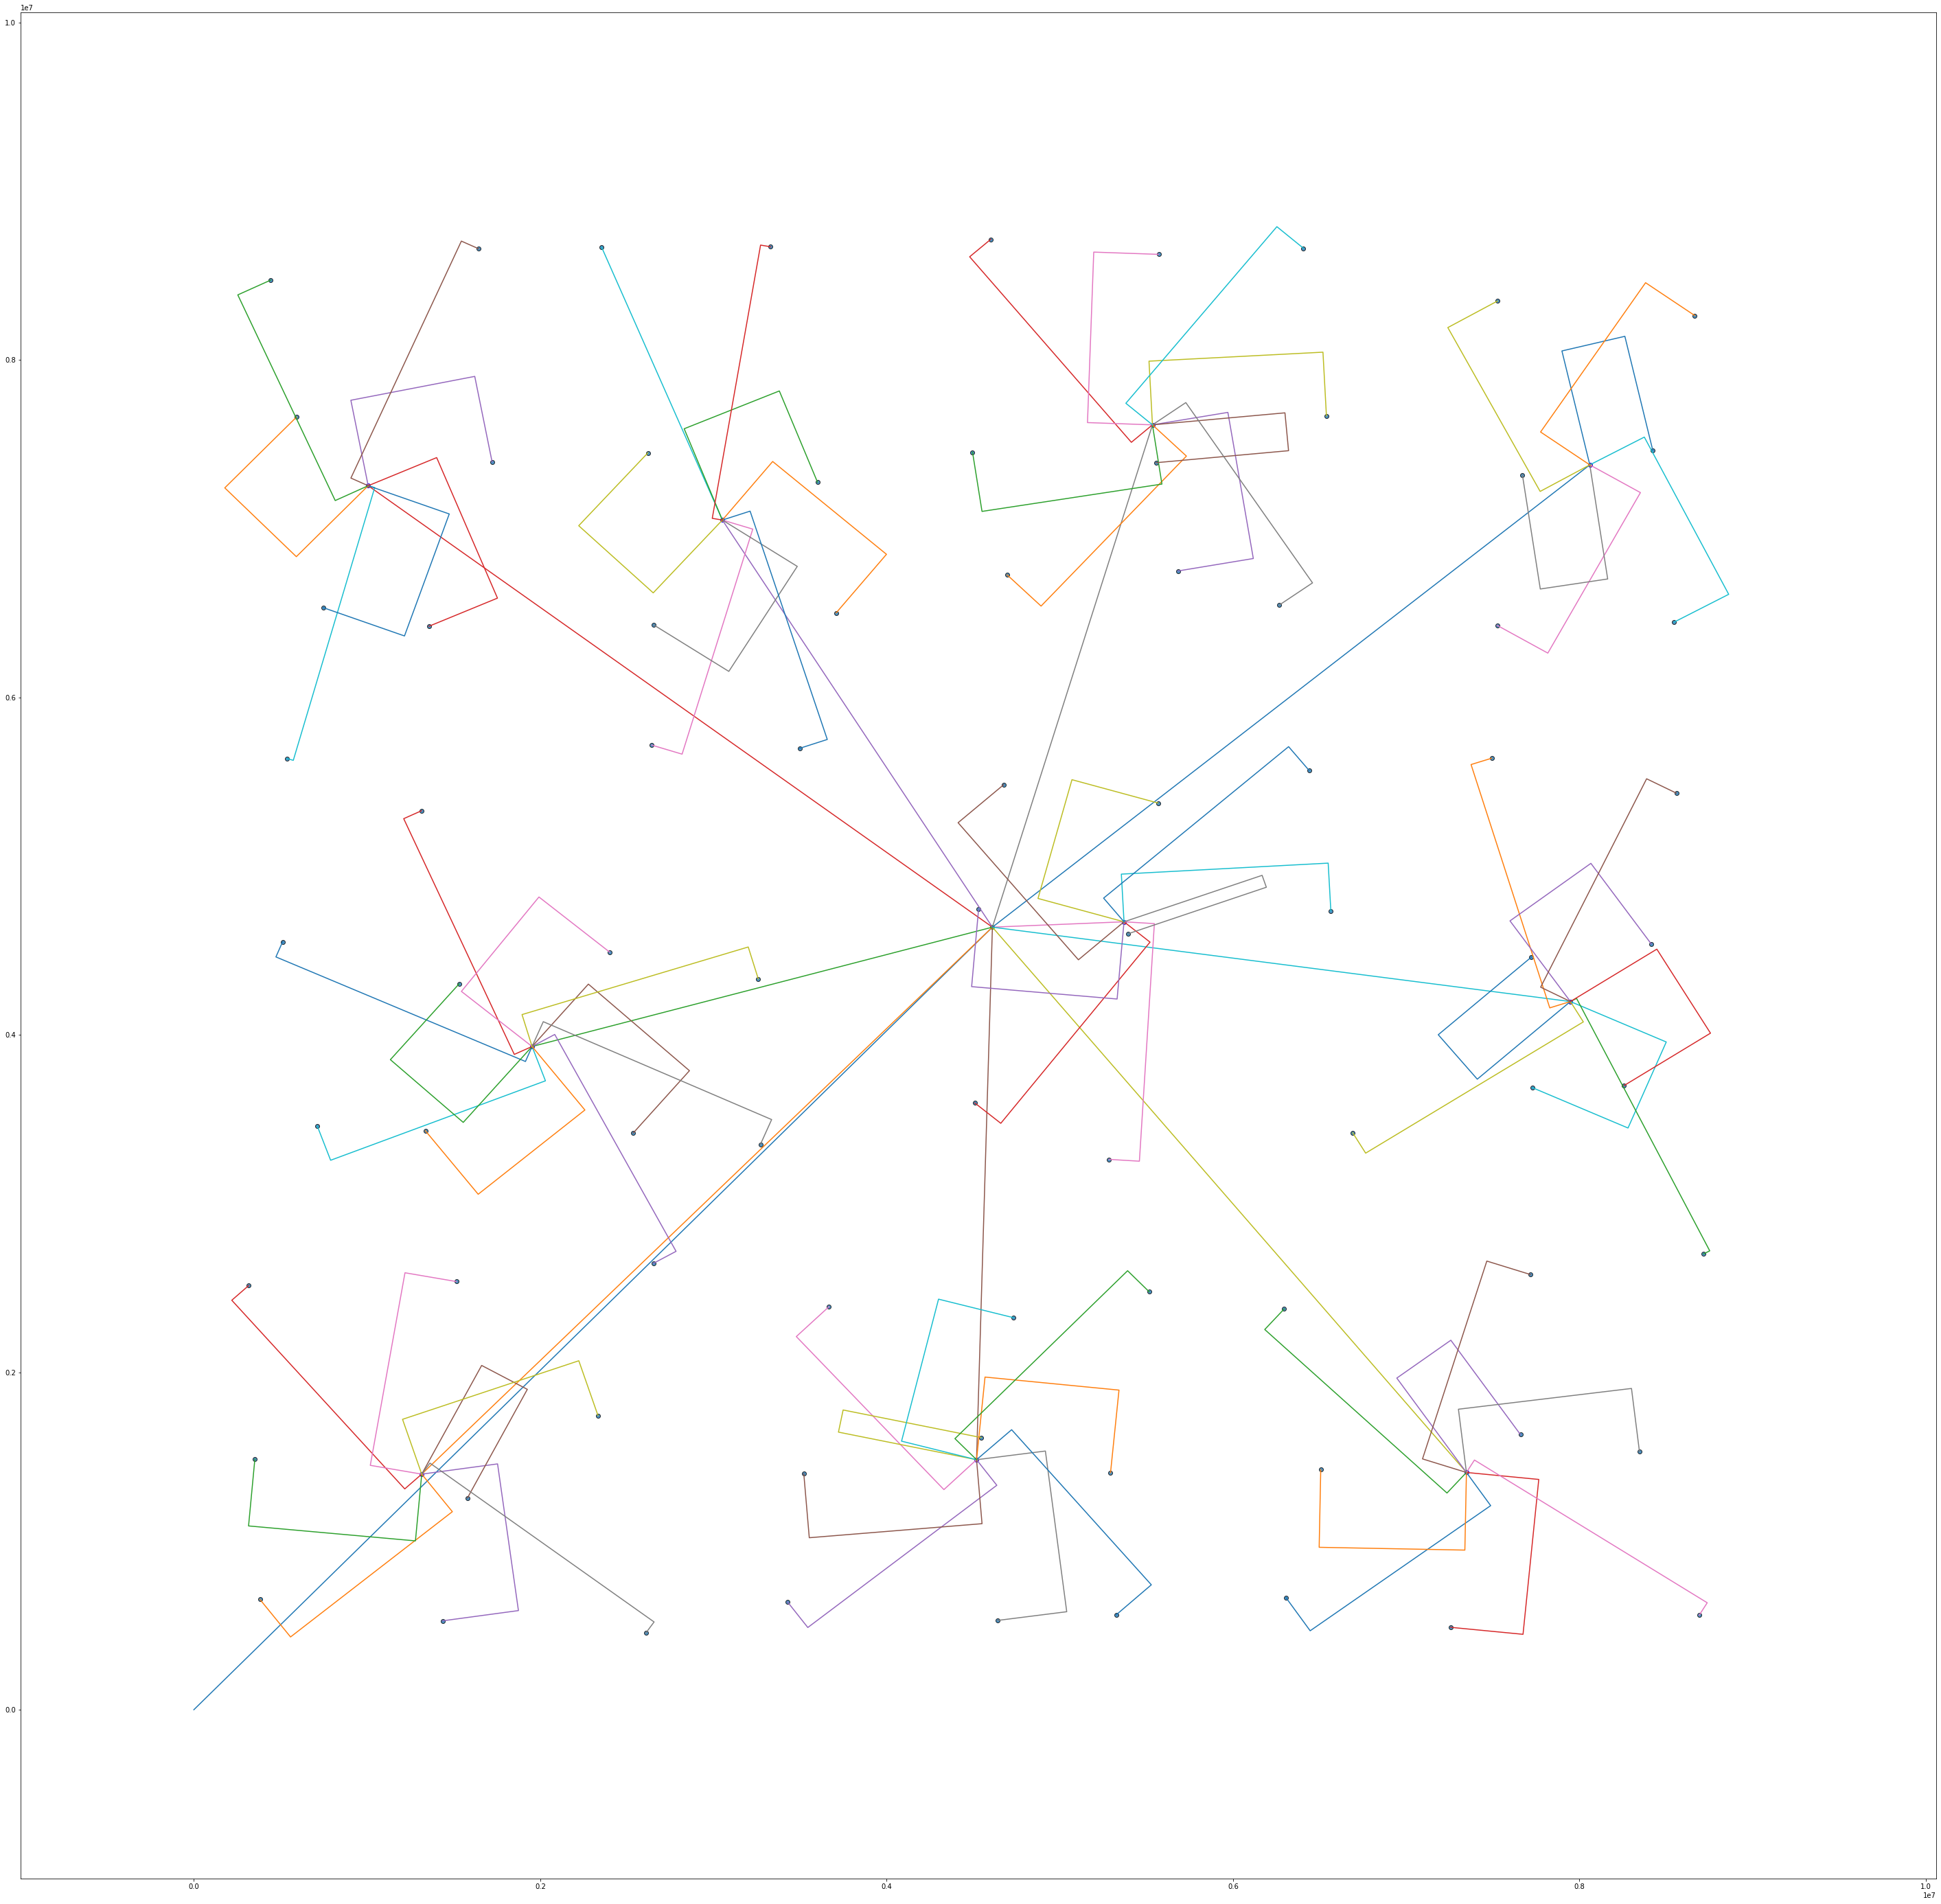

time: 1.6007132530212402 seconds


<Figure size 432x288 with 0 Axes>

In [2]:
import time
start_time = time.time()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import sys
import math
eps = sys.float_info.epsilon
#import networkx as nx



def distuple(p1,p2):
    (x1,y1) = p1
    (x2,y2) = p2
    d=((x1-x2)**2+(y1-y2)**2)**.5
    return(d)

def dist(x1,y1,x2,y2):
    d=((x1-x2)**2+(y1-y2)**2)**.5
    return(d)

def rotate(origin, point, angle=90):
    ox, oy = origin
    px, py = point
    qx = ox + math.cos(math.radians(angle)) * (px - ox) - math.sin(math.radians(angle)) * (py - oy)
    qy = oy + math.sin(math.radians(angle)) * (px - ox) + math.cos(math.radians(angle)) * (py - oy)
    return qx, qy

def getXpoint(p1,p2,dist):
    m = (p2[1]-p1[1])/(p2[0]-p1[0]+eps)
    d = (math.atan(m))
    if(p2[0]>p1[0]):
        x = p1[0]+dist*math.cos(abs(d))
    elif(p2[0]<p1[0]):
        x = p1[0]-dist*math.cos(abs(d))
    else: x = p1[0]
    if(p2[1]>p1[1]):
        y = p1[1]+dist*math.sin(abs(d))
    elif(p2[1]<p1[1]):
        y = p1[1]-dist*math.sin(abs(d))
    else: y = p1[1]
    return x,y

def getX2point(p1,p2,p):
    x = p2[0] + (p[0]-p1[0])
    y = p2[1] + (p[1]-p1[1])
    return x,y




%matplotlib inline


data=pd.read_csv("data.csv")

df1=pd.DataFrame({
    'x':data["sinkx"],
    'y':data["sinky"]
})



#k-means clustering
num=10

kmeans1=KMeans(n_clusters=num)
kmeans1.fit(df1)

labels1=kmeans1.predict(df1)
centroids=kmeans1.cluster_centers_

kmeans2=KMeans(n_clusters=1)
kmeans2.fit(centroids)

labels2=kmeans2.predict(centroids)
center=kmeans2.cluster_centers_





centroidsx=[]
centroidsy=[]
indx=[]
done=[num]

i=0
while i<num:
    indx.append(i)
    i+=1

i=0
for x1 in labels1:
    br=0
    for x2 in indx:
        for x3 in done:
            if x1==x3:
                br=1
                break
        if br==1:
            break
        elif x1==x2:
            cent=centroids[i]
            centroidsx.append(cent[0])
            centroidsy.append(cent[1])
            done.append(x2)
            i+=1
        
del(done[0])

px=df1['x']
py=df1['y']

labels_list=[]
for x in labels1:
    labels_list.append(x)

    
    
    
#distance_updated

d=[]
cluster_index=[]
cluster_ind=[]
j=0

for x1 in done:
    cluster_ind.append([])
    for i in [i for i, x2 in enumerate(labels_list) if x2==x1]:
        cluster_index.append(i)
        cluster_ind[j].append(i)
    for x4 in cluster_index:
        d.append(dist(centroidsx[x1],centroidsy[x1],px[x4],py[x4]))
    cluster_index=[]
    j+=1

dmax=max(d)




df2=pd.DataFrame({
    'x':centroidsx,
    'y':centroidsy
})

fig=plt.figure(figsize=(50,50))
plt.scatter(df1['x'],df1['y'],alpha=0.8,edgecolor='k')
plt.scatter(df2['x'],df2['y'],alpha=1,edgecolor='b')
plt.scatter(center[0][0],center[0][1])


plt.xlim(-1000000,10060000)
plt.ylim(-1000000,10060000)





#plot_draw

plt.plot([0,center[0][0]],[0,center[0][1]])
for x in done:
    plt.plot([center[0][0],centroidsx[x]],[center[0][1],centroidsy[x]])
    

pointx=[]
pointy=[]
centroids_arrng=[]


i=0
for x1 in done:
    centroids_arrng.append(centroids[x1])
        

i=0
for x1 in done:
    pointx.append([])
    pointy.append([])
    for x2 in cluster_ind[i]:
        pointx[i].append(px[x2])
        pointy[i].append(py[x2])
    i+=1


    
    
for (c,px,py) in zip(centroids_arrng,pointx,pointy):
    for (x,y) in zip(px,py):
        l = distuple(c,(x,y))
        xx = (dmax - l)/2
        pout = rotate(c,getXpoint(c,(x,y),xx))
        pout2 = getX2point(c,(x,y),pout)
        plt.plot([c[0],pout[0],pout2[0],x],[c[1],pout[1],pout2[1],y])
plt.show()
plt.savefig('final_net.png')
print("time: %s seconds" % (time.time() - start_time))




